In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
from experiments import Experiment

df = pd.read_csv('datasets/student_perform.csv')
# Any results you write to the current directory are saved as output.
df.head()

gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Good   
1          25                   Yes                     Good   
2          30                    No                      Bad   
3          35                    No                      Bad   
4          50                    No                      Bad   

  StudentAbsenceDays Class  
0            Under-7     M  
1            Under-7     M  
2            Above-7     L  
3            Above-7     L  
4            Above-7     M

In [2]:
print(df.shape)

(480, 17)


In [3]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

**Data Visualization and Exploration**


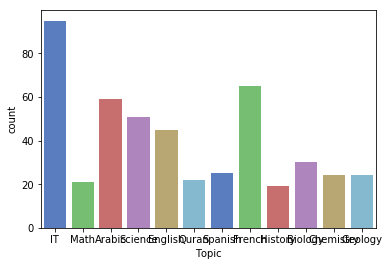

In [4]:
#breakdown by class
sns.countplot(x="Topic", data=df, palette="muted");
plt.show()

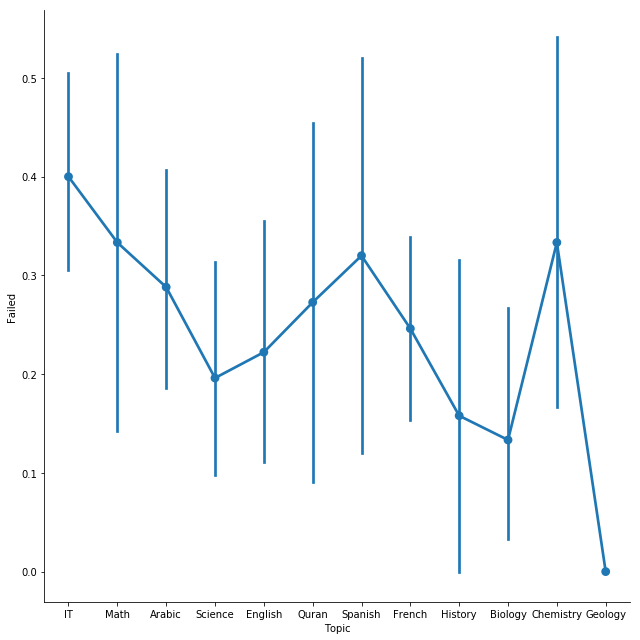

In [5]:
df['Failed'] = np.where(df['Class']=='L',1,0)
sns.factorplot('Topic','Failed',data=df,size=9)

In [6]:
pd.crosstab(df['Class'],df['Topic'])

Topic  Arabic  Biology  Chemistry  English  French  Geology  History  IT  \
Class                                                                      
H          19       16         10       17      20        6        4  15   
L          17        4          8       10      16        0        3  38   
M          23       10          6       18      29       18       12  42   

Topic  Math  Quran  Science  Spanish  
Class                                 
H         6      8       16        5  
L         7      6       10        8  
M         8      8       25       12

It appears that no one failed Geology while students in IT, Chemistry, and Math had the highest probability of failing. 

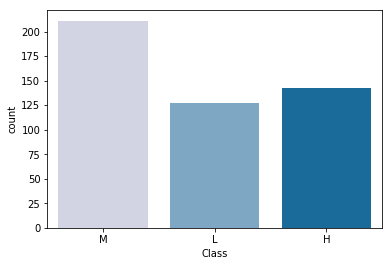

In [7]:
sns.countplot(x='Class',data=df,palette='PuBu')
plt.show()

In [8]:
df.Class.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

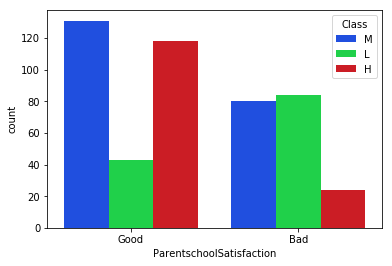

In [9]:
sns.countplot(x='ParentschoolSatisfaction',data = df, hue='Class',palette='bright')
plt.show()

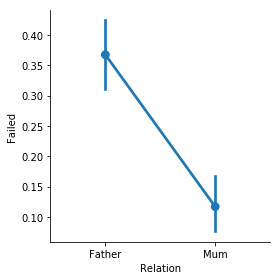

In [10]:
sns.factorplot('Relation','Failed',data=df)

From the students who did well, a large majority of their parents were satisfied with the education they received. The students whose parents were least satisfied with the school performed much worse. The students whose mothers were responsible for them had a higher chance of performing well. 

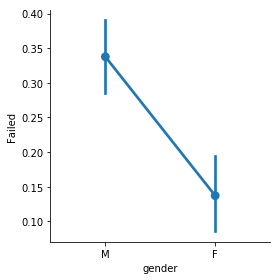

In [11]:
sns.factorplot("gender","Failed",data=df)

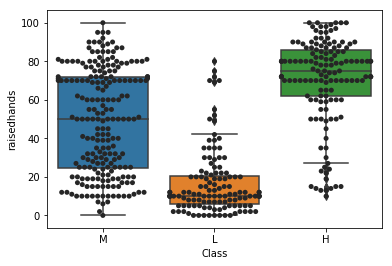

In [12]:
Raised_hand = sns.boxplot(x="Class", y="raisedhands", data=df)
Raised_hand = sns.swarmplot(x="Class", y="raisedhands", data=df, color=".15")
plt.show()

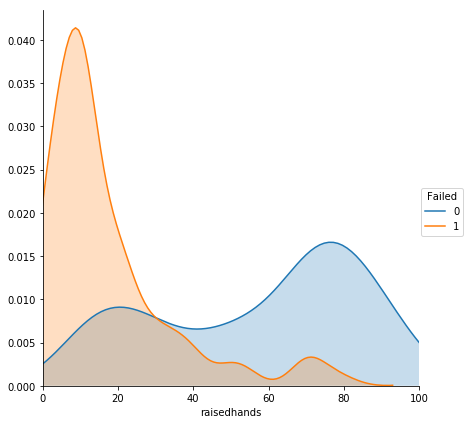

In [13]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=6)
Facetgrid.map(sns.kdeplot,'raisedhands',shade=True)
Facetgrid.set(xlim=(0,df['raisedhands'].max()))
Facetgrid.add_legend()


The boxplot analysis indicates that those who did well were more active in class, and the worst performers were the least active.

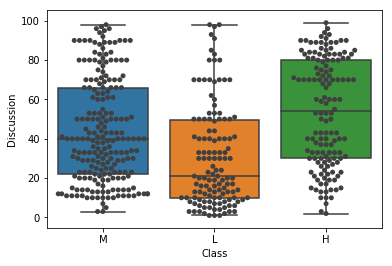

In [14]:
ax = sns.boxplot(x="Class", y="Discussion", data=df)
ax = sns.swarmplot(x="Class", y="Discussion", data=df, color=".25")
plt.show()

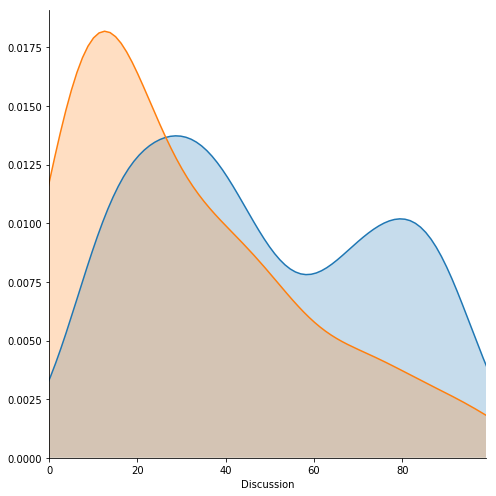

In [15]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=7)
Facetgrid.map(sns.kdeplot,'Discussion',shade=True)
Facetgrid.set(xlim=(0,df['Discussion'].max()))
plt.show()

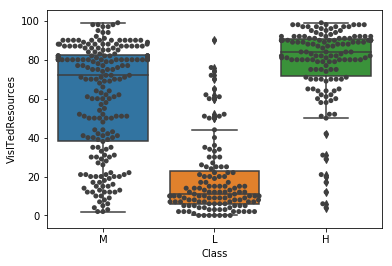

In [16]:
Vis_res = sns.boxplot(x="Class", y="VisITedResources", data=df)
Vis_res = sns.swarmplot(x="Class", y="VisITedResources", data=df, color=".25")
plt.show()

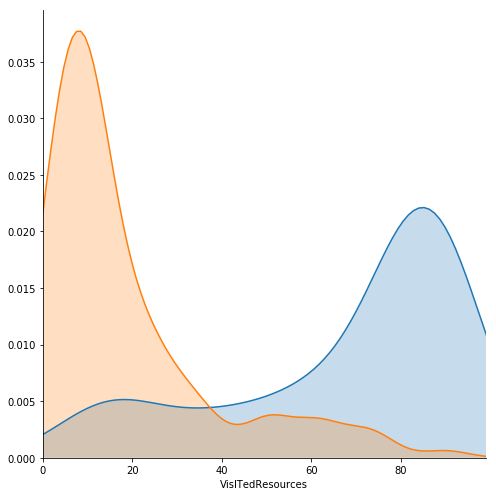

In [17]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=7)
Facetgrid.map(sns.kdeplot,'VisITedResources',shade=True)
Facetgrid.set(xlim=(0,df['VisITedResources'].max()))
plt.show()

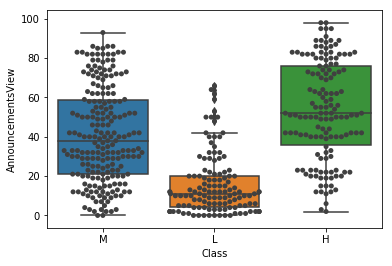

In [18]:
Anounce_bp = sns.boxplot(x="Class", y="AnnouncementsView", data=df)
Anounce_bp = sns.swarmplot(x="Class", y="AnnouncementsView", data=df, color=".25")
plt.show() 

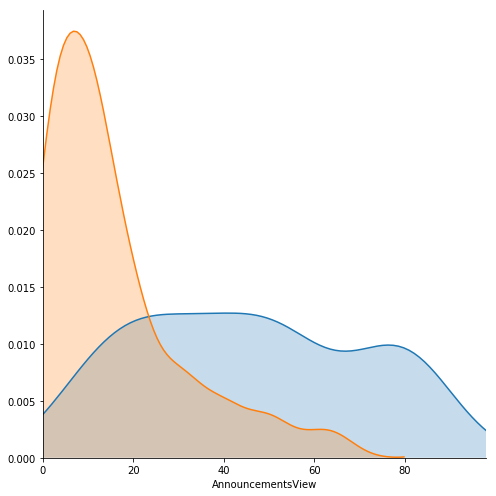

In [19]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=7)
Facetgrid.map(sns.kdeplot,'AnnouncementsView',shade=True)
Facetgrid.set(xlim=(0,df['AnnouncementsView'].max()))
plt.show()

It is clear that the lowest performers rarely visited the course resources. The swarmplot shapes also indicates that the highest and lowest performers had the most consistent habits with respect to viewing the course resources. It also appears that less students from all groups viewed course announcements, but there is still a clear pattern with viewing course announcements and how well the student performed. 

Now that we see the student's academic behavior by marks,  let's go back and see if this pattern is consistent in the Geology class.

In [20]:
df.groupby('Topic').median()


raisedhands  VisITedResources  AnnouncementsView  Discussion  \
Topic                                                                     
Arabic            32.0              65.0               41.0        38.0   
Biology           78.5              88.5               54.0        47.0   
Chemistry         79.0              84.5               47.0        30.5   
English           55.0              50.0               33.0        36.0   
French            35.0              80.0               23.0        21.0   
Geology           80.0              82.0               68.5        60.5   
History           69.0              84.0               72.0        65.0   
IT                20.0              25.0               10.0        40.0   
Math              28.0              15.0               19.0        40.0   
Quran             65.0              75.0               50.0        45.0   
Science           62.0              64.0               58.0        66.0   
Spanish           27.0              51.0               40.0        20.0   

           Failed  
Topic              
Arabic        0.0  
Biology       0.0  
Chemistry     0.0  
English       0.0  
French        0.0  
Geology       0.0  
History       0.0  
IT            0.0  
Math          0.0  
Quran         0.0  
Science       0.0  
Spanish       0.0

In [21]:
df['AbsBoolean'] = df['StudentAbsenceDays']
df['AbsBoolean'] = np.where(df['AbsBoolean'] == 'Under-7',0,1)
df['AbsBoolean'].groupby(df['Topic']).mean()

Topic
Arabic       0.389831
Biology      0.266667
Chemistry    0.500000
English      0.422222
French       0.323077
Geology      0.250000
History      0.473684
IT           0.473684
Math         0.476190
Quran        0.318182
Science      0.450980
Spanish      0.320000
Name: AbsBoolean, dtype: float64

The Geology students seemed to participate more frequently than those in other subjects and attended class more than those in any other subject, which could explain why none of the Geology students failed.

In [22]:
df[9:13].describe()

raisedhands  VisITedResources  AnnouncementsView  Discussion  Failed  \
count     4.000000          4.000000           4.000000    4.000000    4.00   
mean     36.000000         43.750000          18.500000   43.250000    0.25   
std      29.450523         46.636002          13.127579   36.890604    0.50   
min       5.000000          1.000000           0.000000   11.000000    0.00   
25%      15.500000          4.750000          14.250000   11.750000    0.00   
50%      34.500000         43.000000          22.000000   41.000000    0.00   
75%      55.000000         82.000000          26.250000   72.500000    0.25   
max      70.000000         88.000000          30.000000   80.000000    1.00   

       AbsBoolean  
count        4.00  
mean         0.25  
std          0.50  
min          0.00  
25%          0.00  
50%          0.00  
75%          0.25  
max          1.00

** Preprocessing **

In [23]:
exclude = ['Class', 'Failed', 'AbsBoolean', 'NationalITy', 'SectionID']
include = ['VisITedResources', 'AnnouncementsView', 'Discussion']

ex = Experiment(df, 'Class', include, exclude, 'Student', 0xAB)
ex.preprocess()

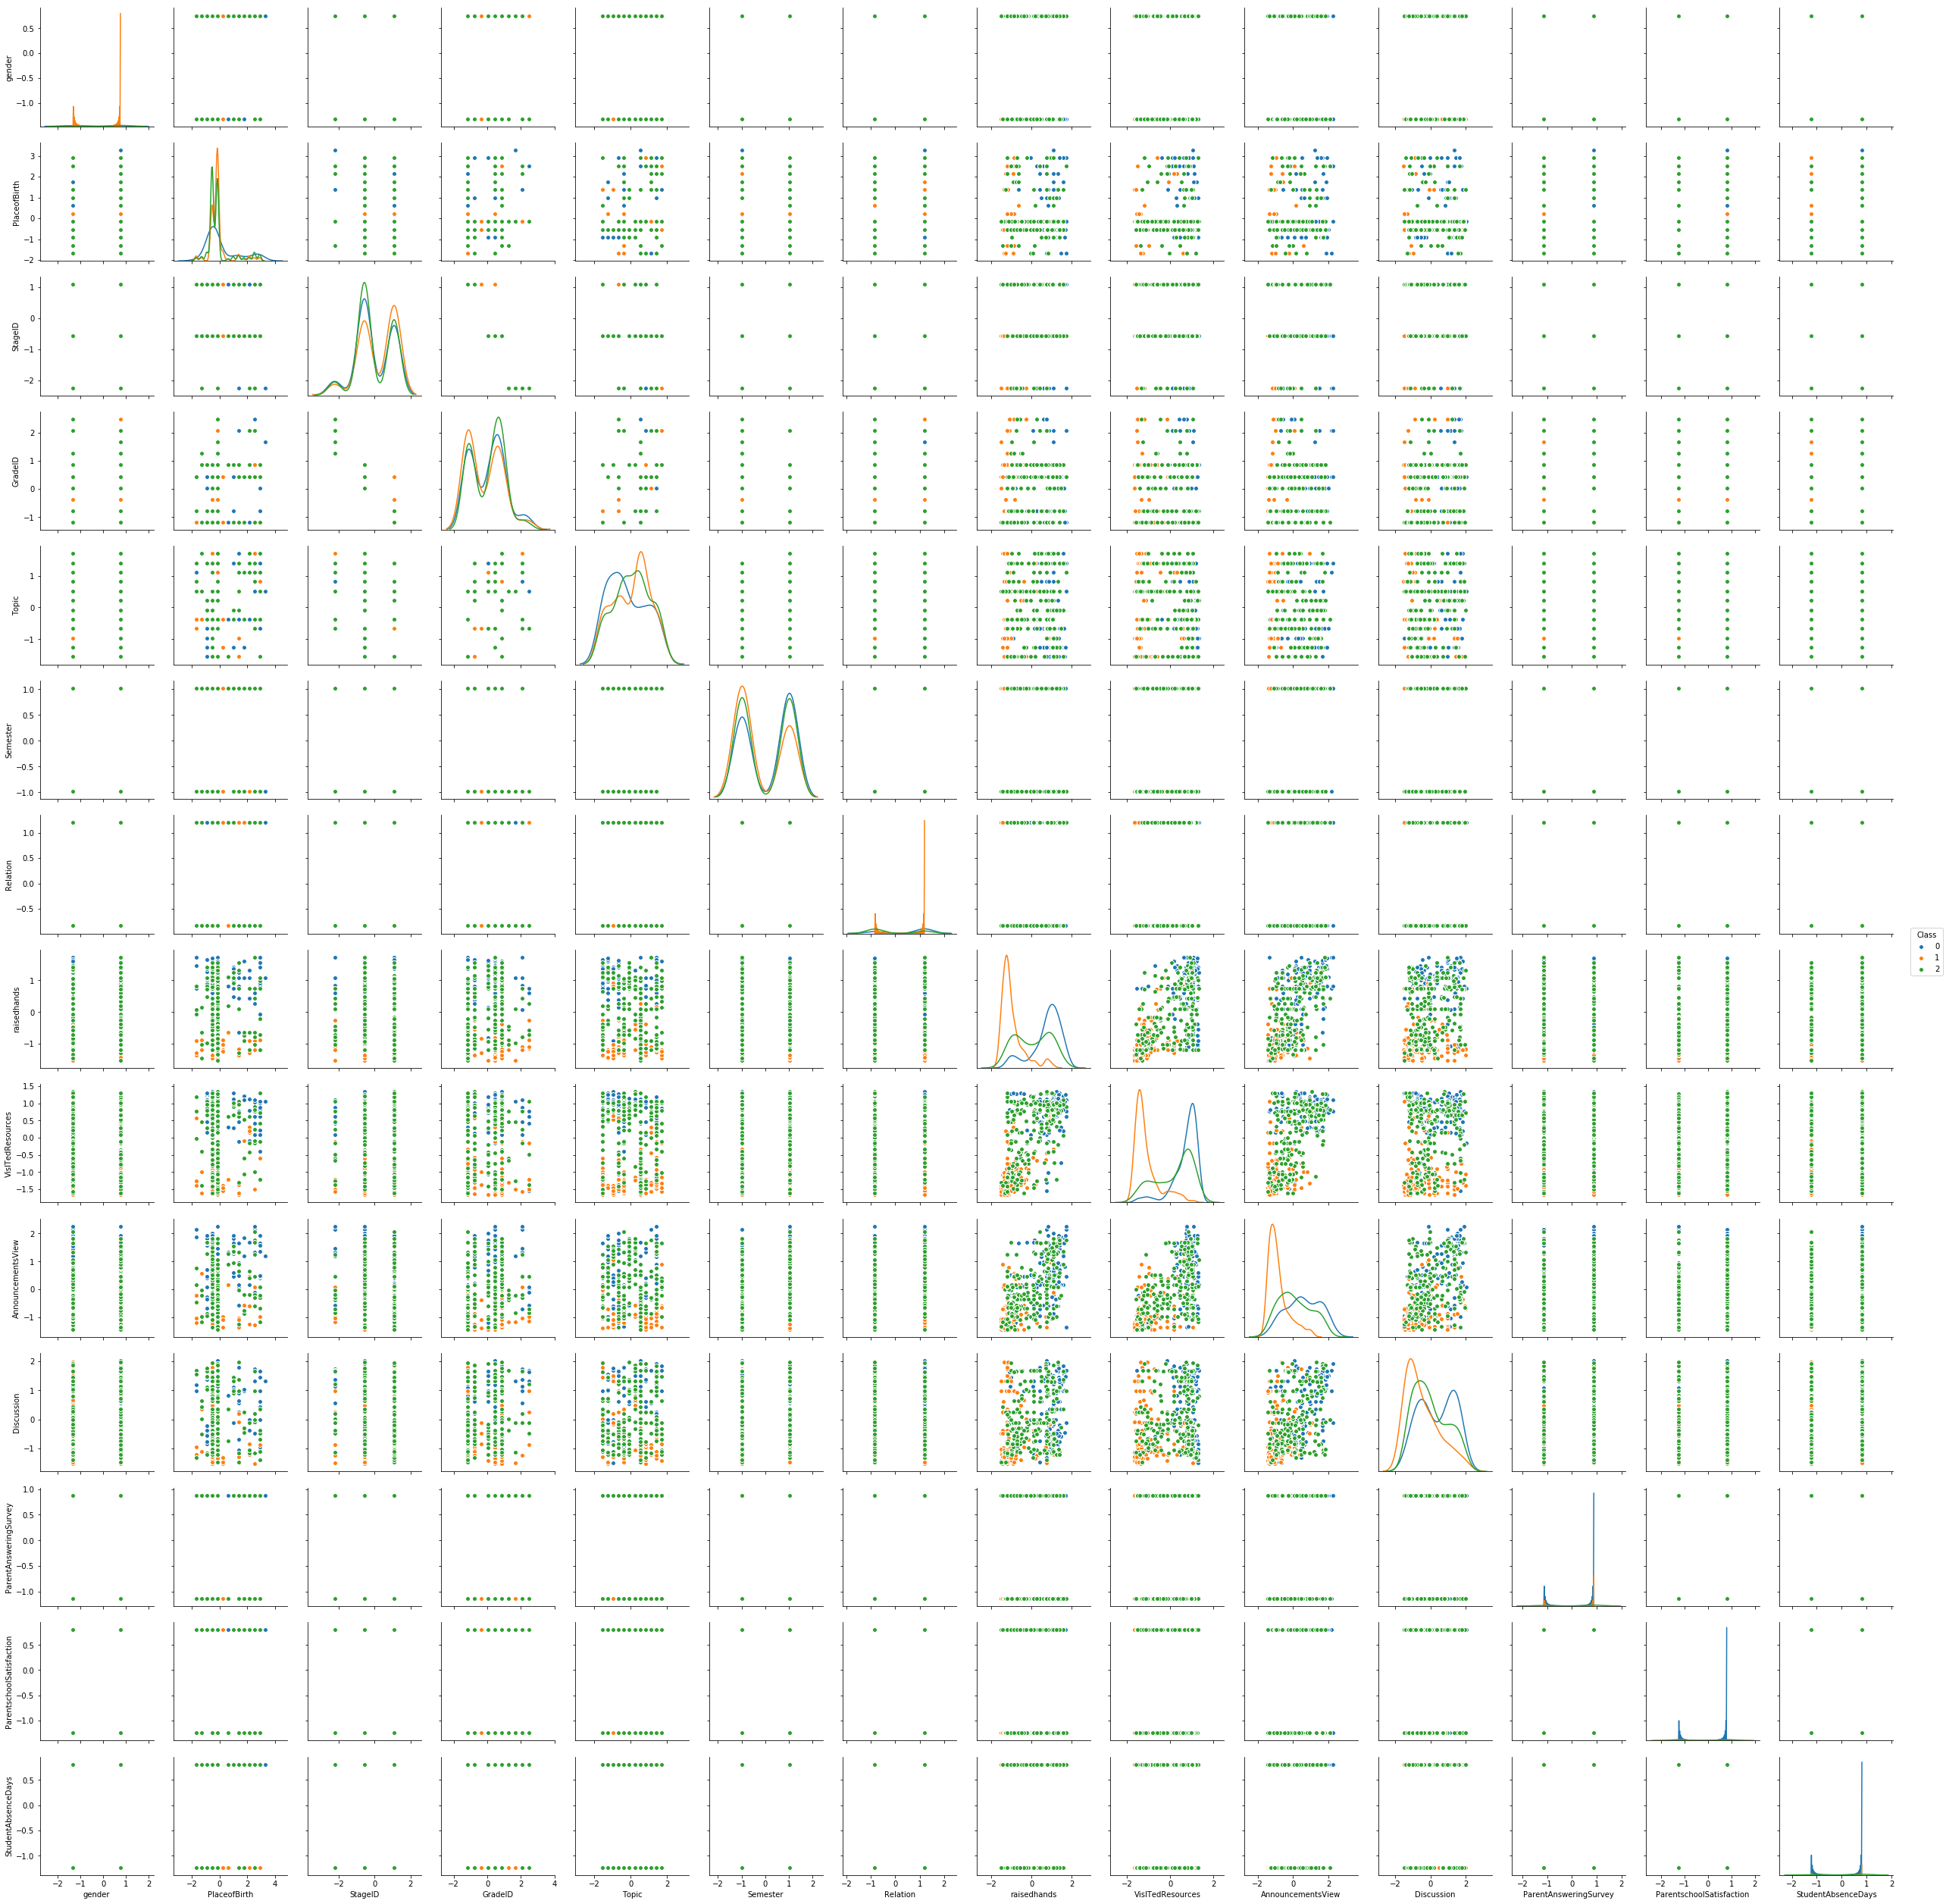

In [24]:
ex.scatter_mat()

# Manual

In [25]:
ex.reduced_set()

   VisITedResources  AnnouncementsView  Discussion
0         -1.174075          -1.351167   -0.843326
1         -1.053029          -1.313549   -0.662225
2         -1.446426          -1.426401   -0.481125
3         -0.901723          -1.238315   -0.300024
4         -0.145191          -0.974994    0.243279


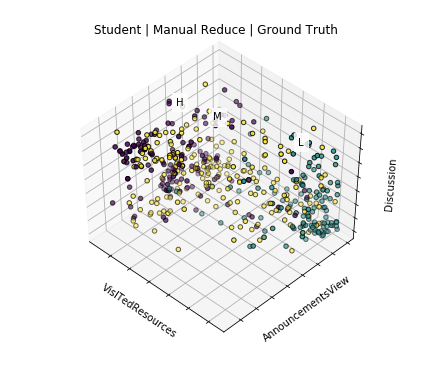

In [26]:
ex.groundTruth(3)

** K-Means with Three Clusters **

-532.254499657
-532.254499657


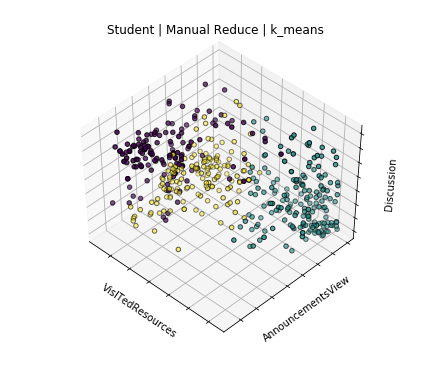

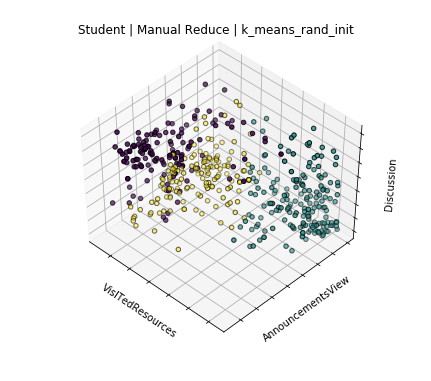

In [27]:
ex.k_means_n_clust(3)

** Gaussian Mixture with 3 components **

-3.42815739128
-3.52847326541
-3.49756445441
-3.75847360763


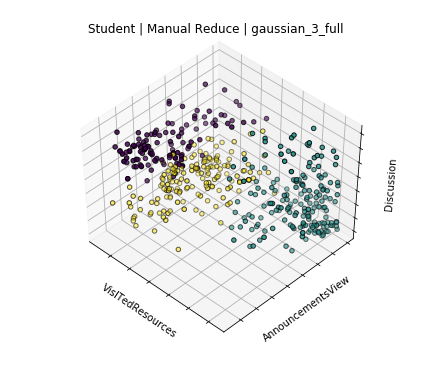

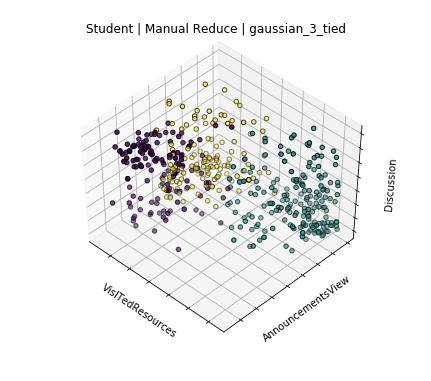

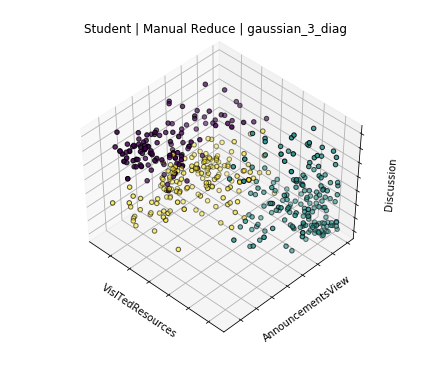

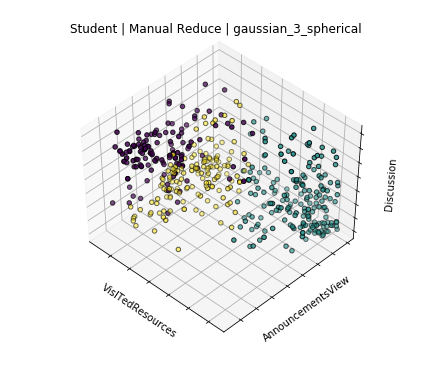

In [28]:
ex.gauss_mix(3)

0.647916666667
0.608333333333


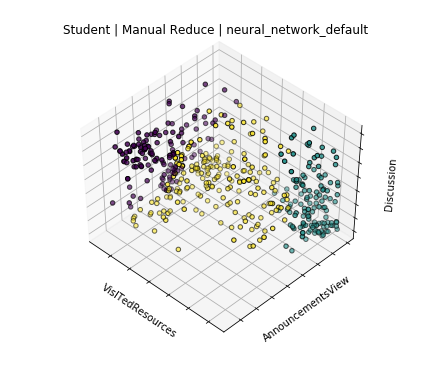

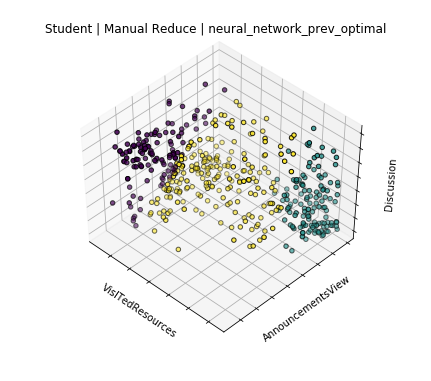

In [29]:
ex.neural_net()

# PCA
Decomposition of Dataset with PCA

In [30]:
ex.decomp_set('pca', 3)

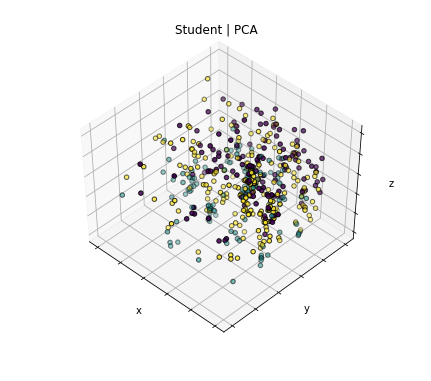

In [31]:
ex.plt_decomp()

-42.8086968227
-43.2687604995


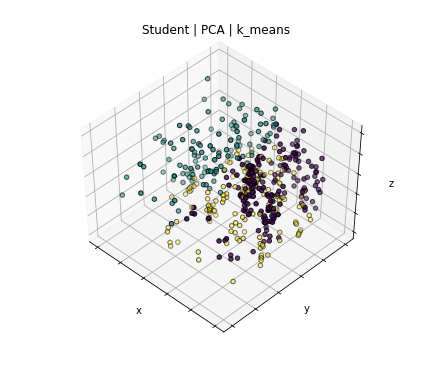

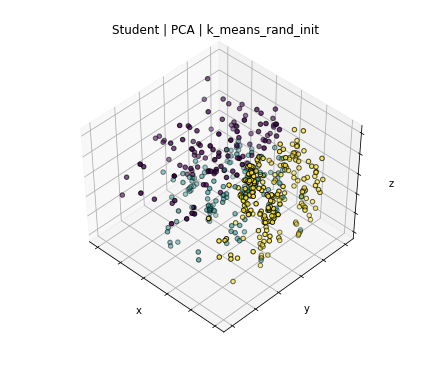

In [32]:
ex.k_means_n_clust(3)

0.386030287781
0.302580818258
0.305889806337
0.20654147725


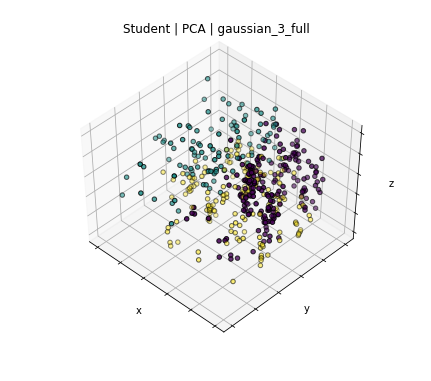

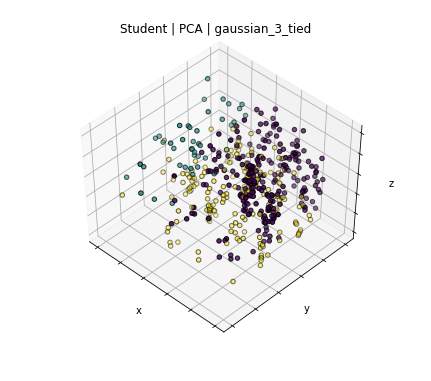

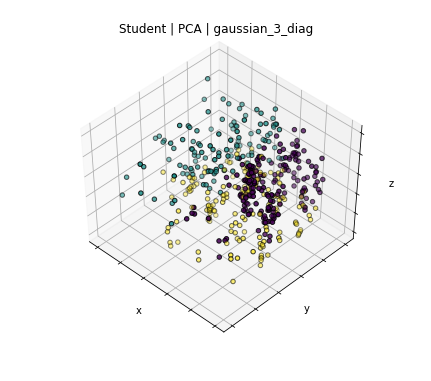

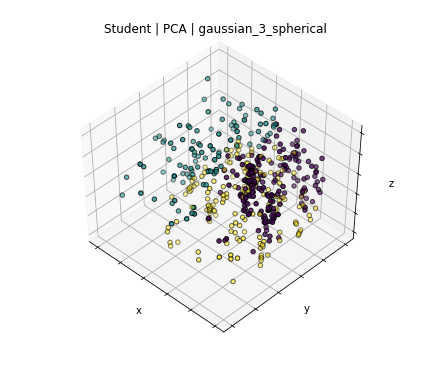

In [33]:
ex.gauss_mix(3)

0.733333333333


/home/rocket/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7125


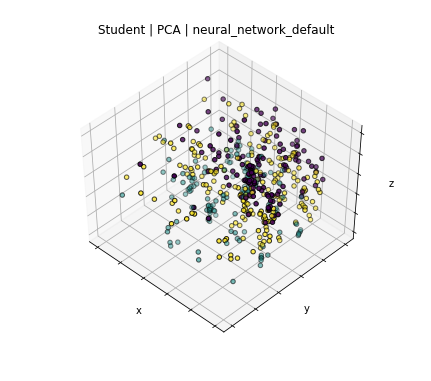

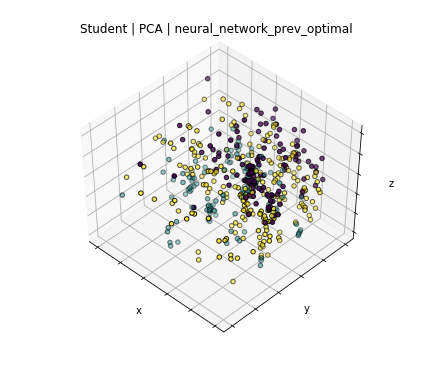

In [34]:
ex.neural_net()

# ICA

In [35]:
ex.decomp_set('ica', 3)

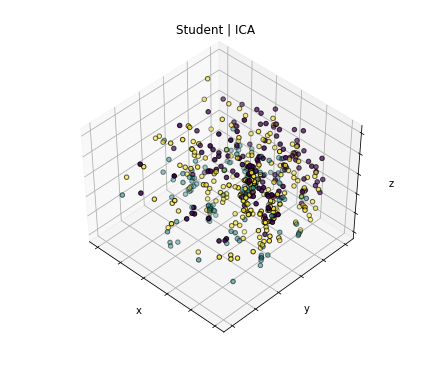

In [36]:
ex.plt_decomp()

-42.8086968227
-43.2687604995


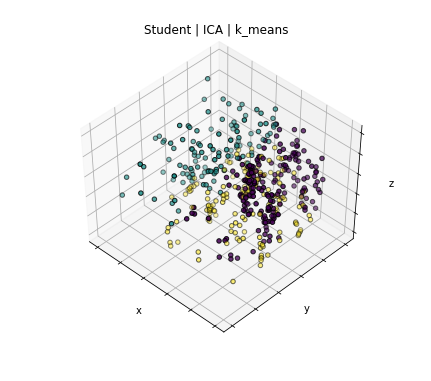

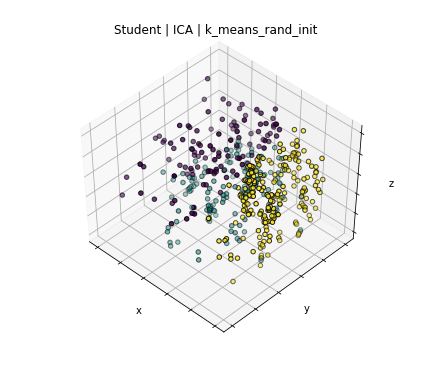

In [37]:
ex.k_means_n_clust(3)

0.386030287781
0.302580818258
0.305889806337
0.20654147725


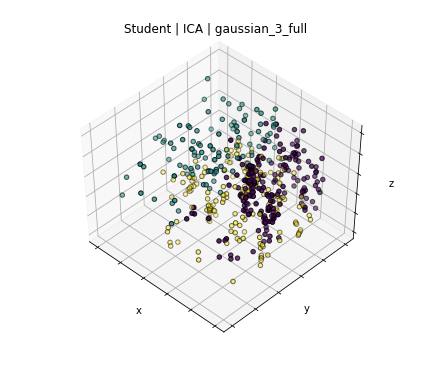

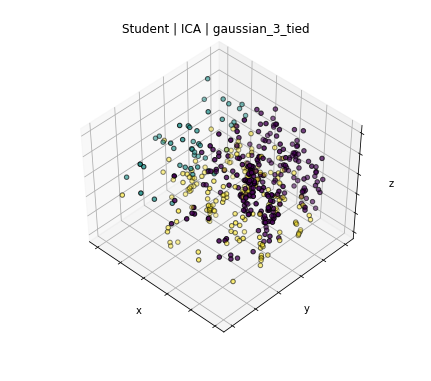

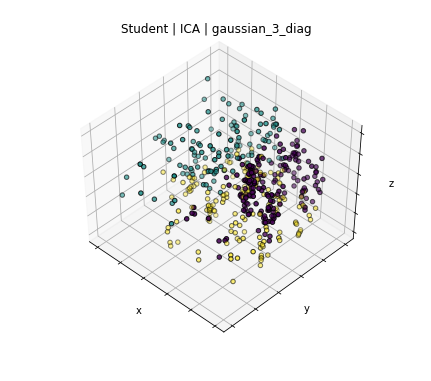

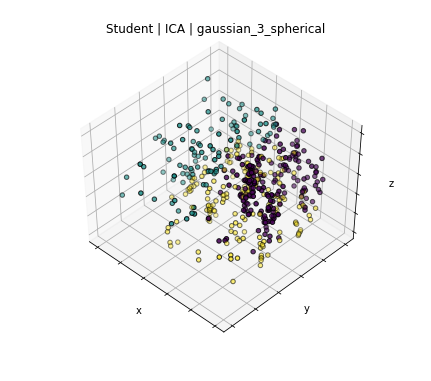

In [38]:
ex.gauss_mix(3)

0.729166666667
0.7125


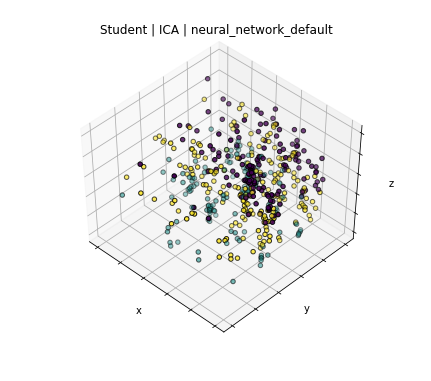

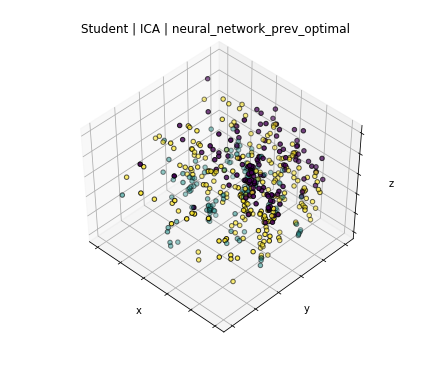

In [39]:
ex.neural_net()

# LDA

In [40]:
ex.decomp_set('lda', 3)

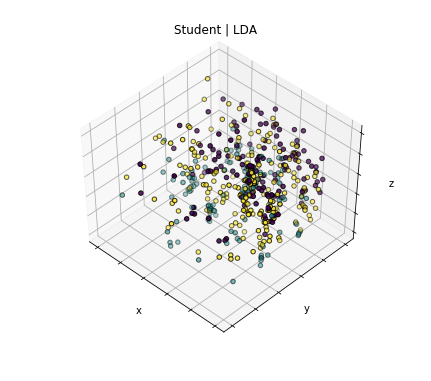

In [41]:
ex.plt_decomp()

-42.8086968227
-43.2687604995


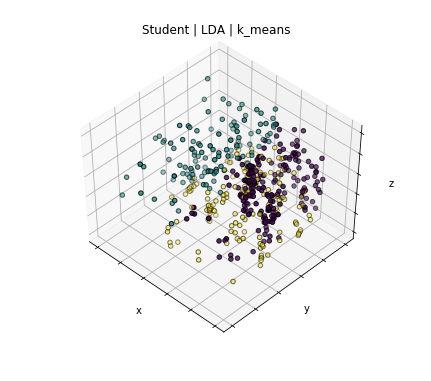

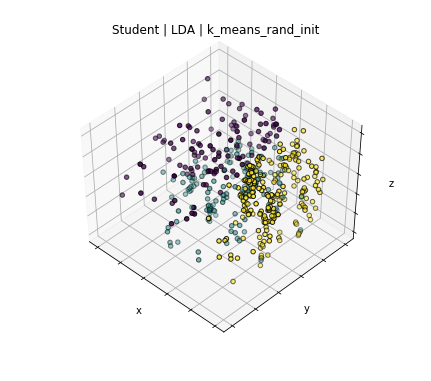

In [42]:
ex.k_means_n_clust(3)

0.386030287781
0.302580818258
0.305889806337
0.20654147725


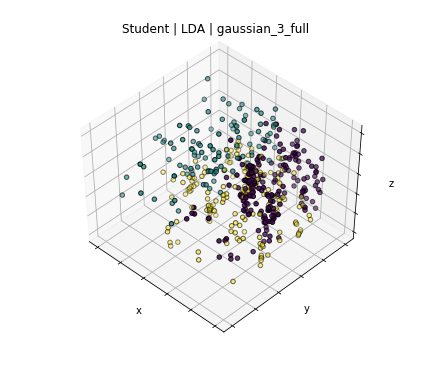

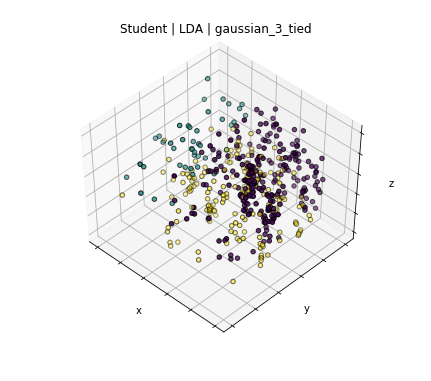

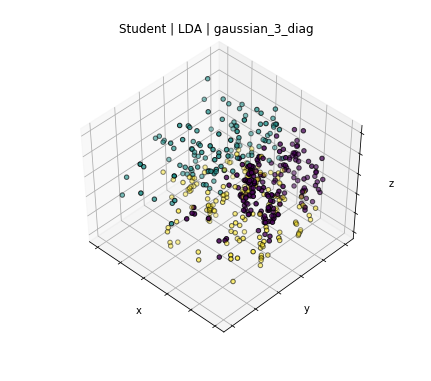

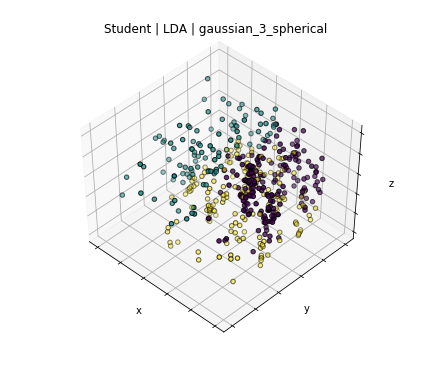

In [43]:
ex.gauss_mix(3)

0.733333333333
0.7125


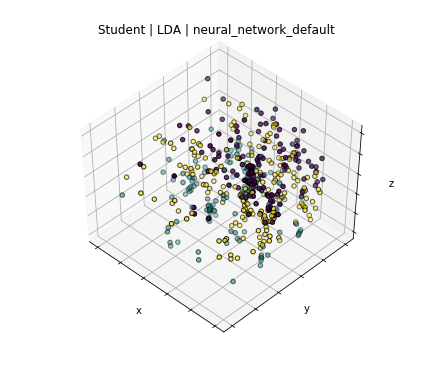

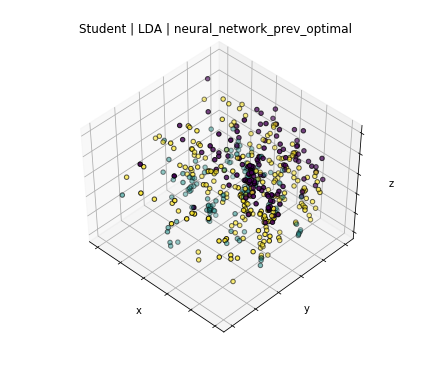

In [44]:
ex.neural_net()

# GRP

In [45]:
ex.decomp_set('grp', 3)

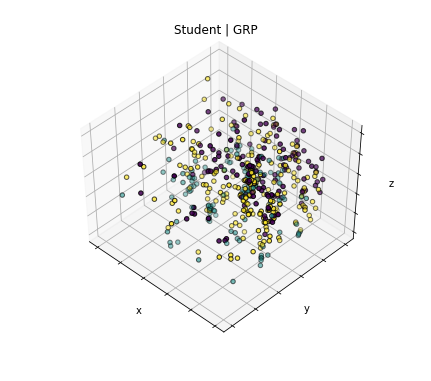

In [46]:
ex.plt_decomp()

-42.8086968227
-43.2687604995


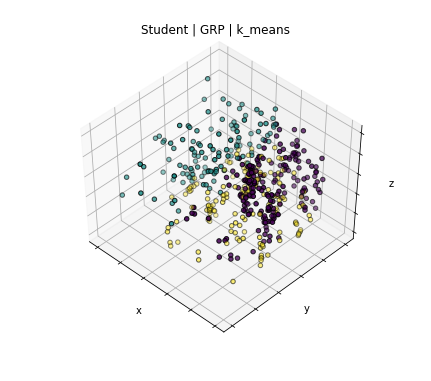

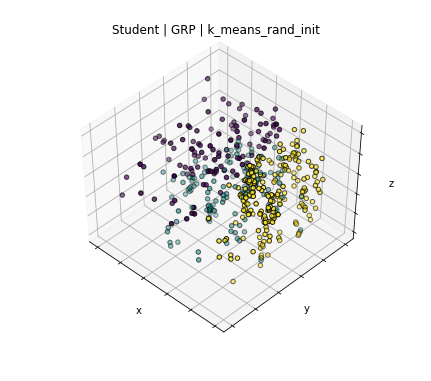

In [47]:
ex.k_means_n_clust(3)

0.386030287781
0.302580818258
0.305889806337
0.20654147725


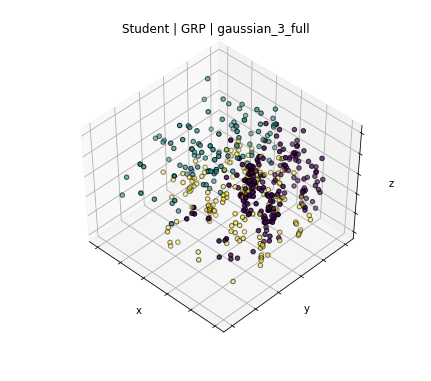

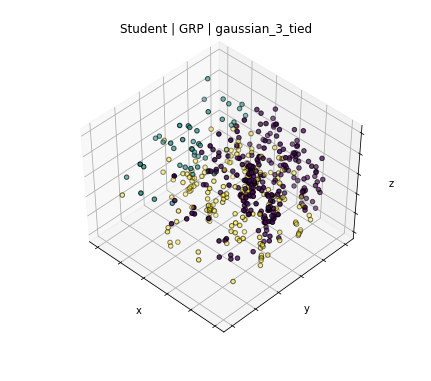

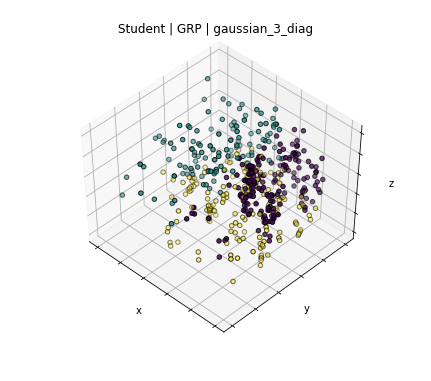

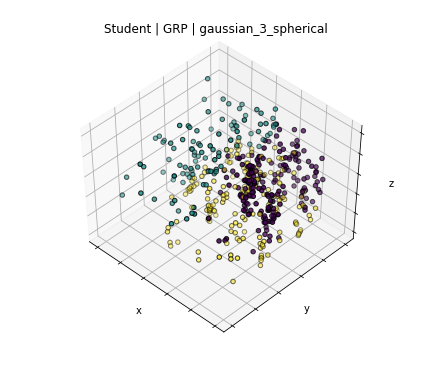

In [48]:
ex.gauss_mix(3)

0.720833333333
0.7125


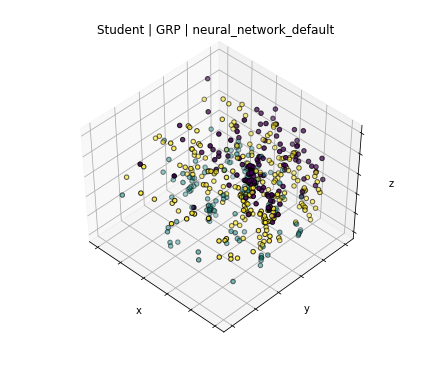

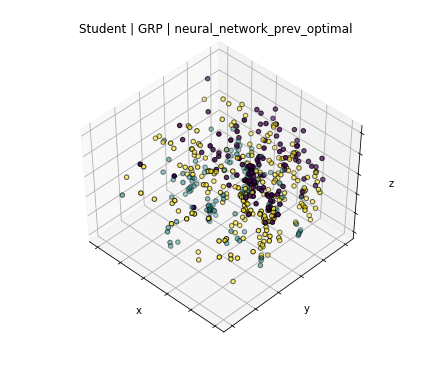

In [49]:
ex.neural_net()